In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

## Data Preparation

#### Get Data

In [149]:
#Read stock data use pandas_datareader.data from web
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [150]:
stk_data 

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-09-25   68.838745  109.942162   46.714001   73.260002  139.455063   
2017-09-26   68.838745  110.462234   46.871498   73.260002  140.114716   
2017-09-27   69.393135  109.783905   47.994999   73.849998  139.254303   
2017-09-28   69.411926  109.783905   48.240501   73.870003  139.254303   
2017-09-29   69.994507  109.346764   48.686001   74.489998  138.699814   
...                ...         ...         ...         ...         ...   
2022-09-16  244.740005  127.269997  102.800003  244.740005  127.269997   
2022-09-19  244.520004  127.730003  103.070000  244.520004  127.730003   
2022-09-20  242.449997  126.300003  101.139999  242.449997  126.300003   
2022-09-21  238.949997  124.930000   99.279999  238.949997  124.930000   
2022-09-22  239.865005  125.820000  100.113602  239.865005  125.820000   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-09-25   46.714001   74.250000  139.608032   46.987499   72.919998   
2017-09-26   46.871498   73.809998  140.936905   47.203999   72.989998   
2017-09-27   47.994999   74.169998  140.439774   48.271500   73.169998   
2017-09-28   48.240501   73.970001  139.445511   48.308998   73.309998   
2017-09-29   48.686001   74.540001  139.282990   48.790501   73.879997   
...                ...         ...         ...         ...         ...   
2022-09-16  102.800003  245.300003  127.529999  103.129997  242.059998   
2022-09-19  103.070000  245.139999  128.059998  103.330002  240.850006   
2022-09-20  101.139999  243.509995  126.989998  102.370003  239.639999   
2022-09-21   99.279999  247.660004  127.839996  102.879997  238.899994   
2022-09-22  100.113602  241.669998  126.000000  100.540001  237.570007   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-09-25  138.537292   46.225498   74.089996  138.738052   46.972500   
2017-09-26  139.521988   46.756001   73.669998  139.923523   46.834499   
2017-09-27  138.652008   47.097500   73.550003  140.229446   47.137001   
2017-09-28  137.868073   47.777500   73.540001  139.254303   47.812500   
2017-09-29  138.546844   48.299999   73.940002  139.053543   48.299999   
...                ...         ...         ...         ...         ...   
2022-09-16  123.830002  100.940002  244.259995  124.360001  102.070000   
2022-09-19  126.279999  101.550003  242.470001  126.489998  101.750000   
2022-09-20  125.519997  100.519997  242.070007  126.900002  102.080002   
2022-09-21  124.919998   99.269997  244.270004  126.889999  101.669998   
2022-09-22  124.449997   98.809998  237.870407  124.760002   98.820000   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-09-25  24149200.0  5452903.0  37468000.0  
2017-09-26  18019600.0  4695076.0  33454000.0  
2017-09-27  19565100.0  3663824.0  46692000.0  
2017-09-28  10883800.0  2902441.0  28018000.0  
2017-09-29  17079100.0  2776816.0  40622000.0  
...                ...        ...         ...  
2022-09-16  39775100.0  9838600.0  42780300.0  
2022-09-19  26826900.0  3981600.0  23036800.0  
2022-09-20  26660300.0  2837500.0  26517100.0  
2022-09-21  28507900.0  3387000.0  31371700.0  
2022-09-22  15850319.0  1950321.0  17693913.0  

[1258 rows x 18 columns]

In [151]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,111.64,1.3457
2017-09-26,112.16,1.3422
2017-09-27,112.76,1.3401
2017-09-28,112.66,1.3435
2017-09-29,112.64,1.3402
...,...,...
2022-09-12,142.41,1.1701
2022-09-13,144.30,1.1526
2022-09-14,142.93,1.1564


In [152]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-15,3901.35,30961.82,26.27
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76


In [153]:
## Select columns
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
# print(Base)
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
# print(X1)
X2 = ccy_data
# print(X2)
X3 = idx_data
# print(X3)

In [154]:
X1

Attributes   Adj Close            
Symbols          GOOGL         IBM
Date                              
2017-09-25   46.714001  109.942162
2017-09-26   46.871498  110.462234
2017-09-27   47.994999  109.783905
2017-09-28   48.240501  109.783905
2017-09-29   48.686001  109.346764
...                ...         ...
2022-09-16  102.800003  127.269997
2022-09-19  103.070000  127.730003
2022-09-20  101.139999  126.300003
2022-09-21   99.279999  124.930000
2022-09-22  100.113602  125.820000

[1258 rows x 2 columns]

In [155]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-09-25,111.64,1.3457
2017-09-26,112.16,1.3422
2017-09-27,112.76,1.3401
2017-09-28,112.66,1.3435
2017-09-29,112.64,1.3402
...,...,...
2022-09-12,142.41,1.1701
2022-09-13,144.30,1.1526
2022-09-14,142.93,1.1564


In [156]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-09-25,2496.66,22296.09,10.21
2017-09-26,2496.84,22284.32,10.17
2017-09-27,2507.04,22340.71,9.87
2017-09-28,2510.06,22381.20,9.55
2017-09-29,2519.36,22405.09,9.51
...,...,...,...
2022-09-15,3901.35,30961.82,26.27
2022-09-16,3873.33,30822.42,26.30
2022-09-19,3899.89,31019.68,25.76


#### Standardized Data

In [157]:
#Standardized data (X1, X2, X3) with kept index (date)
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [158]:
Y = pd.DataFrame()
return_period = 1
Y = Base.shift(-return_period)
X4_3DT = Base.diff(3*return_period).shift(-3*return_period)
X4_6DT = Base.diff(6*return_period).shift(-6*return_period)
X4_12DT = Base.diff(12*return_period).shift(-12*return_period)
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

#### Data Preparation

In [159]:
X1.isnull().sum()


Attributes  Symbols
Adj Close   GOOGL      0
            IBM        0
dtype: int64

In [160]:
X2.isnull().sum()

DEXJPUS    58
DEXUSUK    58
dtype: int64

In [161]:
X3.isnull().sum()

SP500     46
DJIA      46
VIXCLS    42
dtype: int64

In [162]:
# X1.describe()
# X2.describe()
# X3.describe()
X1.fillna(X1.median(),inplace = True)
X2.fillna(X2.median(),inplace = True)
X3.fillna(X3.median(),inplace = True)

In [163]:
X2.isnull().sum()

DEXJPUS    0
DEXUSUK    0
dtype: int64

In [164]:
X3.isnull().sum()

SP500     0
DJIA      0
VIXCLS    0
dtype: int64

In [165]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [166]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
2017-09-26,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2017-09-27,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
2017-09-28,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
2017-09-29,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...
2022-09-16,0.616757,1.088547,4.055628,-2.875734,0.713760,0.542863,0.667768,-1.084891,NaN,NaN
2022-09-19,0.625309,1.130994,NaN,NaN,0.752356,0.590705,0.605566,-0.886275,NaN,NaN
2022-09-20,0.564180,0.999042,NaN,NaN,0.688475,0.514683,0.766830,NaN,NaN,NaN
2022-09-21,0.505268,0.872626,NaN,NaN,0.592565,0.387971,0.862437,NaN,NaN,NaN


In [167]:
Y

Date
2017-09-25     68.838745
2017-09-26     69.393135
2017-09-27     69.411926
2017-09-28     69.994507
2017-09-29     70.107269
                 ...    
2022-09-16    244.520004
2022-09-19    242.449997
2022-09-20    238.949997
2022-09-21    239.865005
2022-09-22           NaN
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [168]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838745,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
2017-09-26,69.393135,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2017-09-27,69.411926,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
2017-09-28,69.994507,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
2017-09-29,70.107269,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16,244.520004,0.616757,1.088547,4.055628,-2.875734,0.713760,0.542863,0.667768,-1.084891,NaN,NaN
2022-09-19,242.449997,0.625309,1.130994,NaN,NaN,0.752356,0.590705,0.605566,-0.886275,NaN,NaN
2022-09-20,238.949997,0.564180,0.999042,NaN,NaN,0.688475,0.514683,0.766830,NaN,NaN,NaN
2022-09-21,239.865005,0.505268,0.872626,NaN,NaN,0.592565,0.387971,0.862437,NaN,NaN,NaN


In [169]:
dataset.isnull().sum()

(Adj Close, MSFT)     47
(Adj Close, GOOGL)    46
(Adj Close, IBM)      46
DEXJPUS                4
DEXUSUK                4
SP500                  1
DJIA                   1
VIXCLS                 1
MSFT_3DT              49
MSFT_6DT              52
MSFT_12DT             58
dtype: int64

In [170]:
dataset = dataset[dataset.isnull().sum(axis=1)<2]

In [171]:
dataset.isnull().sum()

(Adj Close, MSFT)     0
(Adj Close, GOOGL)    0
(Adj Close, IBM)      0
DEXJPUS               0
DEXUSUK               0
SP500                 0
DJIA                  0
VIXCLS                0
MSFT_3DT              0
MSFT_6DT              0
MSFT_12DT             6
dtype: int64

In [172]:
dataset['MSFT_12DT'].fillna(dataset['MSFT_12DT'].median(),inplace = True)

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_14935/3822104876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MSFT_12DT'].fillna(dataset['MSFT_12DT'].median(),inplace = True)


In [173]:
dataset.isnull().sum()

(Adj Close, MSFT)     0
(Adj Close, GOOGL)    0
(Adj Close, IBM)      0
DEXJPUS               0
DEXUSUK               0
SP500                 0
DJIA                  0
VIXCLS                0
MSFT_3DT              0
MSFT_6DT              0
MSFT_12DT             0
dtype: int64

In [174]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838745,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
2017-09-26,69.393135,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2017-09-27,69.411926,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
2017-09-28,69.994507,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
2017-09-29,70.107269,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,264.459991,0.793493,1.199277,4.187001,-2.756698,0.906815,0.773780,0.357911,-1.214379,-1.846314,0.058971
2022-09-09,266.649994,0.865391,1.265714,3.977585,-2.567941,0.995720,0.865261,0.263456,-2.213573,-2.624767,0.058971
2022-09-12,251.990005,0.872042,1.401357,3.973683,-2.396190,1.058279,0.920954,0.387860,-3.793734,-3.163115,0.058971
2022-09-13,252.220001,0.664900,1.086702,4.219519,-2.693779,0.800021,0.611391,0.779501,-1.340375,-1.752801,0.058971


In [175]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1252.000000
mean,181.648574,-0.002766,-0.004769,-0.010590,0.003311,-0.002797,-0.002087,-0.005524,0.002041,1.560697e-17,0.000283
std,78.953673,1.001988,1.000392,0.981567,0.987888,1.001406,1.001838,1.001744,1.000676,1.000400e+00,0.998008
min,68.838745,-1.159659,-3.287369,-1.214892,-2.783906,-1.663539,-2.423450,-1.308869,-5.056778,-4.461759e+00,-3.581766
25%,104.834503,-0.831673,-0.598830,-0.537542,-0.636588,-0.856480,-0.793517,-0.675332,-0.388227,-3.663691e-01,-0.339512
50%,167.318565,-0.462044,-0.130622,-0.266667,-0.003574,-0.385454,-0.361692,-0.205938,0.045357,5.829015e-02,0.058971
75%,253.322960,0.936592,0.769080,0.111518,0.749752,0.932245,1.005011,0.440271,0.443075,4.414897e-01,0.440647
max,340.882782,2.106612,2.364904,4.231226,2.077850,2.055378,1.992546,7.163257,4.964329,3.750115e+00,3.290708


In [176]:
DropCol = dataset.columns[0]
dataset = dataset.drop(dataset.columns[0],axis = 1)

In [177]:
dataCorr = dataset.corr()

<AxesSubplot:>

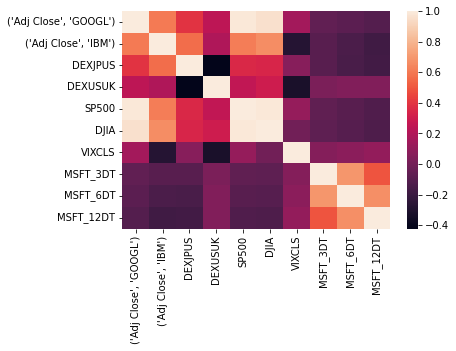

In [178]:
sns.heatmap(dataCorr)

In [179]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.604318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.389339,0.564983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.240791,0.192118,-0.421717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985273,0.611991,0.352845,0.250753,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.960388,0.662841,0.342902,0.297823,0.986259,0.000000,0.000000,0.000000,0.000000,0.0
6,0.150798,-0.281944,0.066975,-0.326829,0.106019,-0.008747,0.000000,0.000000,0.000000,0.0
7,-0.062190,-0.097836,-0.099191,0.024686,-0.071197,-0.072772,0.055586,0.000000,0.000000,0.0
8,-0.083269,-0.142528,-0.148326,0.041637,-0.097393,-0.099669,0.074209,0.691509,0.000000,0.0
9,-0.107469,-0.178117,-0.171852,0.042930,-0.127222,-0.129301,0.104319,0.489082,0.671165,0.0


In [180]:
to_drop = [column for column in lower if any(lower[column] > 0.75)]
to_drop
# dataset.drop(to_drop, inplace=True, axis=1)
# dataset

[('Adj Close', 'GOOGL'), 'SP500']

In [181]:
dataset.insert(loc=0, column=DropCol, value=Y)
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838745,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
2017-09-26,69.393135,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2017-09-27,69.411926,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
2017-09-28,69.994507,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
2017-09-29,70.107269,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,264.459991,0.793493,1.199277,4.187001,-2.756698,0.906815,0.773780,0.357911,-1.214379,-1.846314,0.058971
2022-09-09,266.649994,0.865391,1.265714,3.977585,-2.567941,0.995720,0.865261,0.263456,-2.213573,-2.624767,0.058971
2022-09-12,251.990005,0.872042,1.401357,3.973683,-2.396190,1.058279,0.920954,0.387860,-3.793734,-3.163115,0.058971
2022-09-13,252.220001,0.664900,1.086702,4.219519,-2.693779,0.800021,0.611391,0.779501,-1.340375,-1.752801,0.058971


In [182]:
Y = pd.DataFrame()
Y = dataset[DropCol]
Y

2017-09-25     68.838745
2017-09-26     69.393135
2017-09-27     69.411926
2017-09-28     69.994507
2017-09-29     70.107269
                 ...    
2022-09-08    264.459991
2022-09-09    266.649994
2022-09-12    251.990005
2022-09-13    252.220001
2022-09-14    245.380005
Name: (Adj Close, MSFT), Length: 1252, dtype: float64

In [183]:
X = dataset.drop(dataset.columns[0],axis = 1)
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
2017-09-26,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2017-09-27,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
2017-09-28,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
2017-09-29,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...
2022-09-08,0.793493,1.199277,4.187001,-2.756698,0.906815,0.773780,0.357911,-1.214379,-1.846314,0.058971
2022-09-09,0.865391,1.265714,3.977585,-2.567941,0.995720,0.865261,0.263456,-2.213573,-2.624767,0.058971
2022-09-12,0.872042,1.401357,3.973683,-2.396190,1.058279,0.920954,0.387860,-3.793734,-3.163115,0.058971
2022-09-13,0.664900,1.086702,4.219519,-2.693779,0.800021,0.611391,0.779501,-1.340375,-1.752801,0.058971


In [184]:
Y = Y.reset_index()
Y = Y.drop(columns=['index'])
Y

/var/folders/06/x0cz6tx13kvc8_9kk8nptn600000gn/T/ipykernel_14935/987391753.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y = Y.drop(columns=['index'])


,Adj Close
,MSFT
0,68.838745
1,69.393135
2,69.411926
3,69.994507
4,70.107269
...,...
1247,264.459991
1248,266.649994
1249,251.990005


In [185]:
X = X.reset_index()
X = X.drop(columns=['index'])
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
1,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
3,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
4,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...
1247,0.793493,1.199277,4.187001,-2.756698,0.906815,0.773780,0.357911,-1.214379,-1.846314,0.058971
1248,0.865391,1.265714,3.977585,-2.567941,0.995720,0.865261,0.263456,-2.213573,-2.624767,0.058971
1249,0.872042,1.401357,3.973683,-2.396190,1.058279,0.920954,0.387860,-3.793734,-3.163115,0.058971
1250,0.664900,1.086702,4.219519,-2.693779,0.800021,0.611391,0.779501,-1.340375,-1.752801,0.058971


In [186]:
Test_size = int(np.floor(0.3 * len( X )))
train_size = int(np.floor(0.7 * len( X )))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [187]:
X_train

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.159659,-0.510364,-0.028635,0.589904,-1.286788,-1.525064,-1.185618,0.028605,0.013841,0.114115
1,-1.154671,-0.462374,0.039003,0.530386,-1.286526,-1.527919,-1.190225,0.130551,0.064901,0.175058
2,-1.119086,-0.524967,0.117046,0.494676,-1.271704,-1.514242,-1.224782,0.053270,0.146834,0.155904
3,-1.111310,-0.524967,0.104039,0.552493,-1.267315,-1.504422,-1.261642,-0.007568,0.148023,0.168093
4,-1.097200,-0.565304,0.101437,0.496376,-1.253801,-1.498628,-1.266250,-0.038810,0.108839,0.108891
...,...,...,...,...,...,...,...,...,...,...
871,0.607255,-0.183779,-0.388934,1.385743,0.815497,1.017313,0.021560,0.151223,-0.074951,-0.517836
872,0.614287,-0.104182,-0.357717,1.285412,0.852698,1.059713,-0.054465,-0.778468,0.240779,-0.073162
873,0.660926,-0.132084,-0.370724,1.329626,0.843645,1.028788,-0.082110,-1.343549,-0.385693,0.263545
874,0.658281,-0.067255,-0.343409,1.322824,0.860226,1.074728,-0.146616,-0.253138,-0.691440,0.939712


In [188]:
X_test

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
876,0.570768,-0.077924,-0.391536,1.295616,0.771553,0.980771,0.051509,0.811345,0.505344,1.627767
877,0.576675,0.057472,-0.414949,1.268407,0.811501,1.005807,-0.186932,-0.702441,-0.621557,1.418237
878,0.593525,0.050087,-0.422753,1.164676,0.767804,0.931095,-0.023364,-0.261786,-0.330785,1.510653
879,0.579589,0.063215,-0.396739,1.042240,0.736735,0.930345,0.080306,-0.109714,0.754930,1.710114
880,0.579478,0.264256,-0.355116,1.040539,0.766350,0.978711,-0.079806,-0.156369,1.982918,2.231651
...,...,...,...,...,...,...,...,...,...,...
1247,0.793493,1.199277,4.187001,-2.756698,0.906815,0.773780,0.357911,-1.214379,-1.846314,0.058971
1248,0.865391,1.265714,3.977585,-2.567941,0.995720,0.865261,0.263456,-2.213573,-2.624767,0.058971
1249,0.872042,1.401357,3.973683,-2.396190,1.058279,0.920954,0.387860,-3.793734,-3.163115,0.058971
1250,0.664900,1.086702,4.219519,-2.693779,0.800021,0.611391,0.779501,-1.340375,-1.752801,0.058971


In [189]:
Y_train

,Adj Close
,MSFT
0,68.838745
1,69.393135
2,69.411926
3,69.994507
4,70.107269
...,...
871,231.879410
872,234.743225
873,234.081573


In [190]:
Y_test

,Adj Close
,MSFT
876,233.044708
877,234.614853
878,232.521317
879,229.440247
880,233.528564
...,...
1247,264.459991
1248,266.649994
1249,251.990005


### Model Training and Cross Validation

In [191]:
#Set number of fold / Seed value
Num_fold = 3
Seed = 20

In [192]:
# Cross Validation Model
# set k-fold crossvalidation with shuffle
kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
# kfold

In [193]:
# Model selection
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# Model_LM
# c_val = 1
# c_val = 10
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
# svr_poly

In [194]:
# Calculate accuracy score for each model
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2

In [195]:
# View score k-fold
# Valication score comparison
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly':score_poly})
score

,Linear Model,SVR_linear,SVR_rbf,SVR_poly
0,0.972729,0.969656,0.972651,0.925439
1,0.976458,0.973257,0.971427,0.939341
2,0.973620,0.972478,0.974648,0.944365


In [196]:
score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()],'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})
score_mean

,AVG Linear Model,AVG SVR_linear,AVG SVR_rbf,AVG SVC_poly
0,0.974269,0.971797,0.972908,0.936382


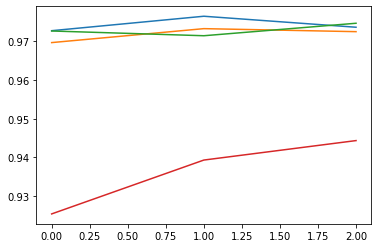

In [197]:
plt.plot(score)

### Model Evaluation

In [198]:
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)
# SVR_Linear

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2

In [199]:
X_test

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
876,0.570768,-0.077924,-0.391536,1.295616,0.771553,0.980771,0.051509,0.811345,0.505344,1.627767
877,0.576675,0.057472,-0.414949,1.268407,0.811501,1.005807,-0.186932,-0.702441,-0.621557,1.418237
878,0.593525,0.050087,-0.422753,1.164676,0.767804,0.931095,-0.023364,-0.261786,-0.330785,1.510653
879,0.579589,0.063215,-0.396739,1.042240,0.736735,0.930345,0.080306,-0.109714,0.754930,1.710114
880,0.579478,0.264256,-0.355116,1.040539,0.766350,0.978711,-0.079806,-0.156369,1.982918,2.231651
...,...,...,...,...,...,...,...,...,...,...
1247,0.793493,1.199277,4.187001,-2.756698,0.906815,0.773780,0.357911,-1.214379,-1.846314,0.058971
1248,0.865391,1.265714,3.977585,-2.567941,0.995720,0.865261,0.263456,-2.213573,-2.624767,0.058971
1249,0.872042,1.401357,3.973683,-2.396190,1.058279,0.920954,0.387860,-3.793734,-3.163115,0.058971
1250,0.664900,1.086702,4.219519,-2.693779,0.800021,0.611391,0.779501,-1.340375,-1.752801,0.058971


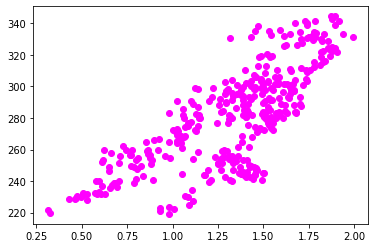

In [200]:
plt.scatter(X_test['DJIA'], LM_pred,c='magenta')

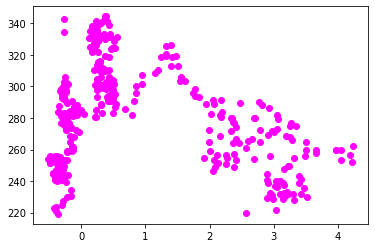

In [201]:
plt.scatter(X_test["DEXJPUS"], LM_pred,c='magenta')

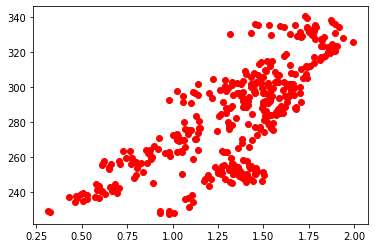

In [202]:
plt.scatter(X_test["DJIA"],SVR_Linear,c='red')

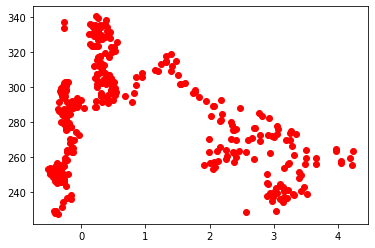

In [203]:
plt.scatter(X_test["DEXJPUS"],SVR_Linear,c='red')

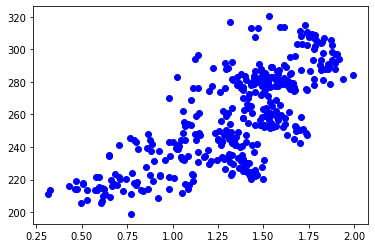

In [204]:
plt.scatter(X_test['DJIA'], SVR_Rbf,c='blue')

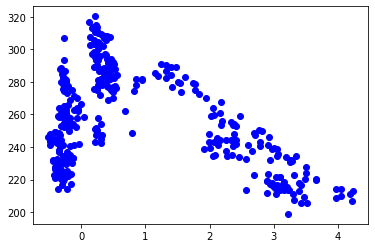

In [205]:
plt.scatter(X_test["DEXJPUS"], SVR_Rbf,c='blue')

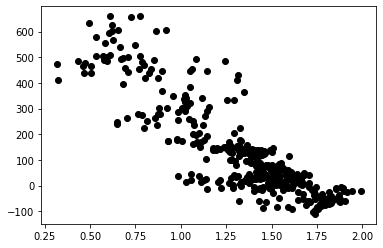

In [206]:
plt.scatter(X_test['DJIA'], SVR_Poly,c='black')

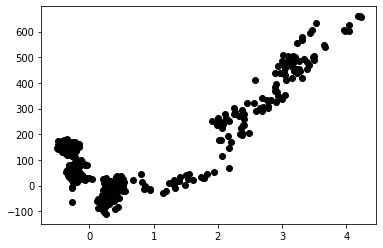

In [207]:
plt.scatter(X_test['DEXJPUS'], SVR_Poly,c='black')

In [208]:
# Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )
Lm_MSE = metrics.mean_squared_error(Y_test, LM_pred)
Lm_MSE

107.9274129514003

In [209]:
LM_r2 = metrics.r2_score(Y_test, LM_pred)
LM_r2

0.8545548899667631

In [210]:
SVR_linear_MSE = metrics.mean_squared_error(Y_test, SVR_Linear)
SVR_linear_MSE

79.74770577744083

In [211]:
SVR_linear_r2 = metrics.r2_score(Y_test, SVR_Linear)
SVR_linear_r2

0.8925304190611789

In [212]:
SVR_Rbf_MSE = metrics.mean_squared_error(Y_test, SVR_Rbf)
SVR_Rbf_MSE

876.0271750453405

In [213]:
SVR_Rbf_r2 = metrics.r2_score(Y_test, SVR_Rbf)
SVR_Rbf_r2

-0.18055149643908952

In [214]:
SVR_Poly_MSE = metrics.mean_squared_error(Y_test, SVR_Poly)
SVR_Poly_MSE

61809.437925946266

In [215]:
SVR_Poly_r2 = metrics.r2_score(Y_test, SVR_Poly)
SVR_Poly_r2

-82.29561743761913

In [216]:
mse = {Lm_MSE,SVR_linear_MSE,SVR_Rbf_MSE,SVR_Poly_MSE}
r2 = {LM_r2,SVR_linear_r2,SVR_Rbf_r2,SVR_Poly_r2}

In [217]:
mse

{79.74770577744083, 107.9274129514003, 876.0271750453405, 61809.437925946266}

In [218]:
r2

{-82.29561743761913,
 -0.18055149643908952,
 0.8545548899667631,
 0.8925304190611789}

<BarContainer object of 4 artists>

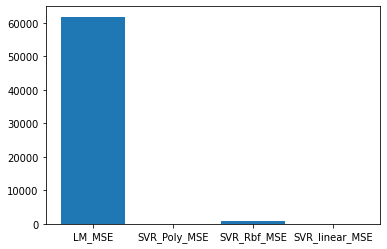

In [219]:
plt.bar(["LM_MSE","SVR_Poly_MSE","SVR_Rbf_MSE","SVR_linear_MSE"],mse)

<BarContainer object of 4 artists>

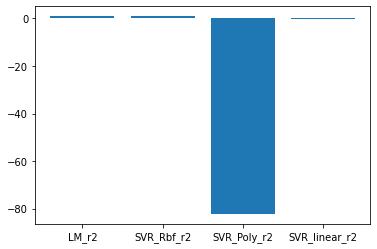

In [220]:
plt.bar(["LM_r2","SVR_Rbf_r2","SVR_Poly_r2","SVR_linear_r2"],r2)